

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>AutoML</b></div>

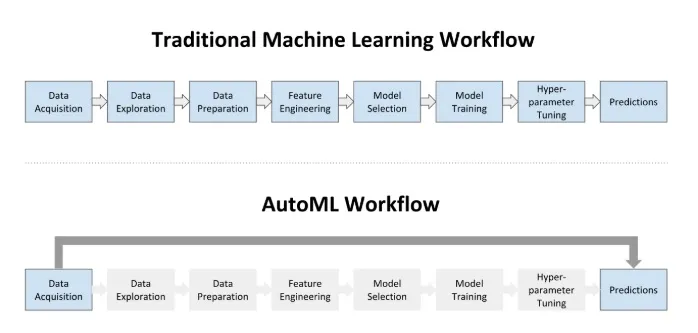

**Image credits:** https://miro.medium.com/v2/resize:fit:1100/format:webp/1*aqonxCij9ZyOnxNWpkkKvA.jpeg


AutoML, short for Automated Machine Learning, refers to the process of automating the end-to-end process of applying machine learning to real-world problems. The goal of AutoML is to automate as many steps as possible in the machine learning pipeline, reducing the amount of manual effort required from data preprocessing to model deployment. This automation is achieved through the use of algorithms and techniques that allow for automatic feature engineering, model selection, hyperparameter optimization, and model deployment.

Key aspects of AutoML include:

1. **Data Preparation**: Handling data ingestion, cleaning, transformation, and feature engineering to prepare the data for modeling.

2. **Model Selection**: Automatically selecting the best-performing machine learning models based on the dataset and problem type.

3. **Hyperparameter Optimization**: Automatically tuning the hyperparameters of selected models to optimize their performance.

4. **Model Evaluation**: Evaluating and comparing models using metrics relevant to the problem at hand.

5. **Ensemble Methods**: Combining predictions from multiple models (ensembles) to improve overall predictive accuracy.

6. **Deployment**: Facilitating the deployment of trained models into production environments.

### So in this complete notebook we will look at some of the major AutoML libraries
1. Lazypredict
2. TPOT
3. H2O AutoML
4. H2O with sklearn

### In future I will include
1. AutoSklearn
2. AutoViML
3. PyCaret
4. EvalML
5. Some AutoEDA libraries too

#### Though I tried including all these in the first version itself but eventually I wasnt able to either install or load these so anyways I will find some solution and post it up



<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Will AutoML replace data scientists? NO</div>

### Here are several reasons why AutoML is not expected to replace data scientists:

1. **Domain Expertise**: Data scientists bring domain knowledge and understanding of specific business problems, which is crucial for framing machine learning tasks, interpreting results, and translating insights into actionable strategies. AutoML tools can automate technical aspects but still require human expertise to contextualize and apply results effectively.

2. **Complex Problem Solving**: Many real-world problems require creative problem-solving and innovative approaches that go beyond standard machine learning techniques. Data scientists are essential for designing custom solutions, adapting algorithms to unique challenges, and experimenting with new methodologies.

3. **Data Understanding and Preparation**: While AutoML can handle some aspects of data preprocessing, such as missing value imputation and feature engineering, understanding the nuances of data, identifying biases, and curating datasets for specific tasks often require human judgment and domain expertise.

4. **Interpretability and Explainability**: Data scientists are responsible for interpreting model outputs, understanding their limitations, and ensuring models are explainable and fair. AutoML may produce complex models that are harder to interpret without human intervention.

5. **Iterative Improvement**: Developing effective machine learning solutions often involves iterative improvement cycles, where data scientists analyze model performance, make adjustments, and validate results. AutoML can accelerate these cycles but typically requires human oversight to ensure continuous improvement and adaptability.

6. **Problem Framing and Solution Design**: Data scientists play a crucial role in framing machine learning problems in ways that align with business objectives, identifying appropriate metrics for evaluation, and integrating machine learning solutions into broader organizational workflows.

In [1]:
# We will use GPU to make the process fast as it is adviced to use GPU with h2o automl as it integrates gpu support in xgboost
!nvidia-smi

Sat Oct  5 06:21:13 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----



<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>Installing all important libraries</b></div>

In [2]:
!pip install tpot

In [3]:
!pip install h2o

In [4]:
!pip install lazypredict



<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>LazyPredict</b></div>

LazyPredict is a AutoML library designed to simplify the process of building and evaluating machine learning models. It automates the creation and comparison of multiple machine learning models with minimal code, making it an excellent tool for quickly assessing various algorithms on a given dataset. Here are some key features and benefits of LazyPredict:

### Key Features

1. **Model Selection and Comparison:**
   - LazyPredict creates and evaluates multiple machine learning models without requiring detailed parameter tuning or configuration. This allows users to quickly compare the performance of different algorithms.

2. **Ease of Use:**
   - With a simple and intuitive API, LazyPredict makes it easy to use for both beginners and experienced data scientists. It requires minimal setup and can be integrated into existing workflows seamlessly.

3. **Comprehensive Model Evaluation:**
   - The library evaluates a wide range of models from scikit-learn, including linear models, ensemble methods, and tree-based algorithms. It provides metrics such as accuracy, F1 score, and more to compare model performance.

5. **Time-Saving:**
   - By automating the model training and evaluation process, LazyPredict saves significant time, especially in the initial stages of model development and selection.


### Limitations

- **Not for Production:**
  While LazyPredict is great for initial exploration, it is not intended for production use. Once a model is selected, further tuning and validation are necessary.

- **Limited Customization:**
  The library abstracts much of the model training process, which limits the ability to customize and fine-tune models compared to manual coding.


In [5]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 15.81it/s]

[LightGBM] [Info] Number of positive: 254, number of negative: 144
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3976
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.638191 -> initscore=0.567521
[LightGBM] [Info] Start training from score 0.567521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 29/29 [00:01<00:00, 19.21it/s]

[LightGBM] [Info] Number of positive: 254, number of negative: 144
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3976
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.638191 -> initscore=0.567521
[LightGBM] [Info] Start training from score 0.567521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

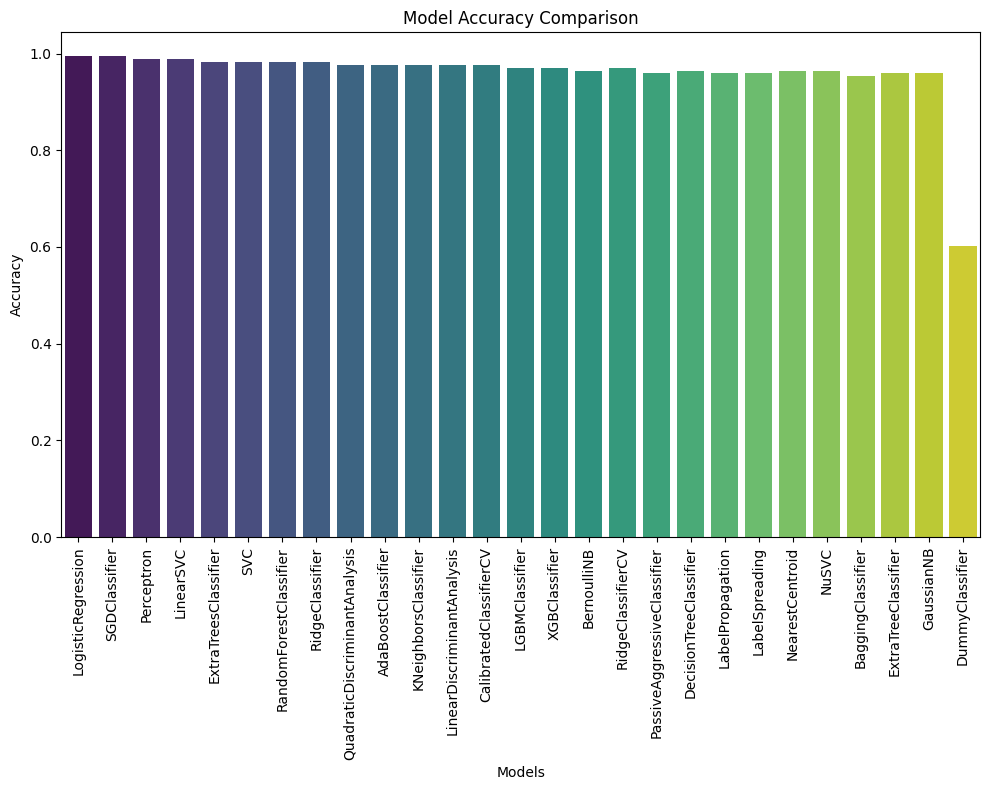

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

plt.figure(figsize=(10, 8))
sns.barplot(x=models.index, y=models['Accuracy'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [7]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.99,0.99,0.99,0.99,0.03
SGDClassifier,0.99,0.99,0.99,0.99,0.02
Perceptron,0.99,0.99,0.99,0.99,0.01
LinearSVC,0.99,0.99,0.99,0.99,0.03
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.18
SVC,0.98,0.98,0.98,0.98,0.03
RandomForestClassifier,0.98,0.98,0.98,0.98,0.28
RidgeClassifier,0.98,0.98,0.98,0.98,0.02
QuadraticDiscriminantAnalysis,0.98,0.98,0.98,0.98,0.01


In [8]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np



from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X, y = shuffle(housing.data, housing.target, random_state=13)

offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 76%|███████▌  | 32/42 [02:25<00:25,  2.58s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 95%|█████████▌| 40/42 [02:52<00:05,  2.93s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 18576, number of used features: 8
[LightGBM] [Info] Start training from score 2.063611


100%|██████████| 42/42 [02:52<00:00,  4.11s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.84       0.84  0.47        0.56
XGBRegressor                                 0.84       0.84  0.48        0.34
LGBMRegressor                                0.83       0.83  0.48        0.23
ExtraTreesRegressor                          0.82       0.82  0.50        4.32
RandomForestRegressor                        0.82       0.82  0.50       12.49
BaggingRegressor                             0.80       0.80  0.53        1.27
GradientBoostingRegressor                    0.78       0.78  0.55        3.94
NuSVR                                        0.75       0.75  0.59       17.45
SVR                                          0.74       0.74  0.60       12.97
MLPRegressor                                 0.71       0.71  0.63       15.49
KNeighborsRegressor                          0.70   

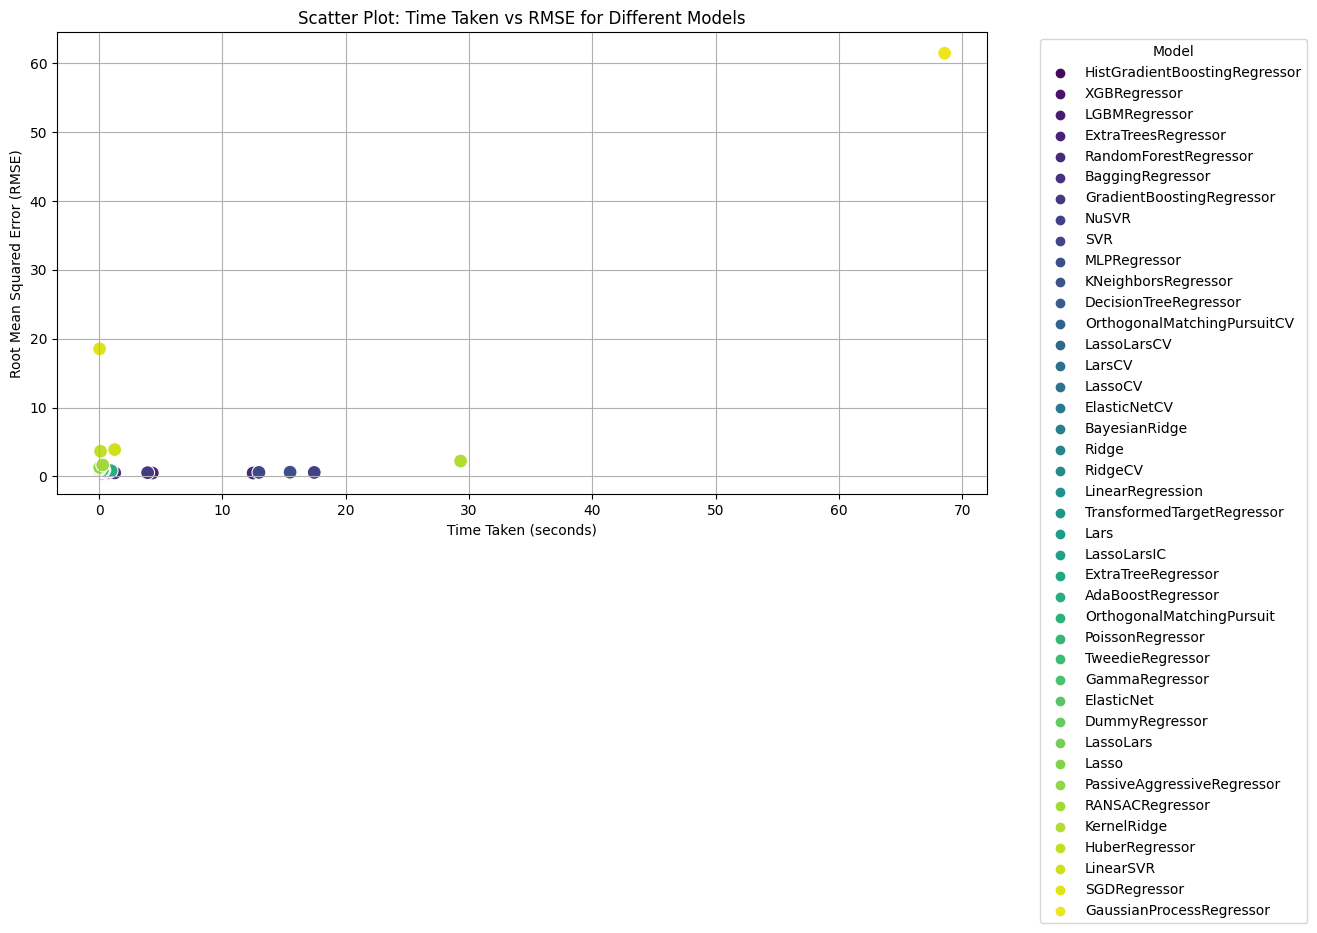

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'models' is a DataFrame obtained from LazyRegressor's fit method
# Create a DataFrame for visualization
df = models.reset_index()

# Create a scatter plot: Time Taken vs RMSE
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Time Taken', y='RMSE', hue='Model', palette='viridis', s=100)
plt.title('Scatter Plot: Time Taken vs RMSE for Different Models')
plt.xlabel('Time Taken (seconds)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [10]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.84,0.84,0.47,0.56
XGBRegressor,0.84,0.84,0.48,0.34
LGBMRegressor,0.83,0.83,0.48,0.23
ExtraTreesRegressor,0.82,0.82,0.50,4.32
RandomForestRegressor,0.82,0.82,0.50,12.49
BaggingRegressor,0.80,0.80,0.53,1.27
GradientBoostingRegressor,0.78,0.78,0.55,3.94
NuSVR,0.75,0.75,0.59,17.45
SVR,0.74,0.74,0.60,12.97




<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>TPOT</b></div>

TPOT (Tree-based Pipeline Optimization Tool) is an automated machine learning (AutoML) library in Python that uses genetic programming to optimize machine learning pipelines. It aims to automate the process of selecting the best model and hyperparameters for a given dataset, making it easier to create high-performing machine learning models without extensive manual tuning.

Here are some key features and concepts of TPOT:

1. **Genetic Programming:**
   TPOT uses genetic programming to explore and optimize machine learning pipelines. Genetic programming is an evolutionary algorithm-based methodology inspired by biological evolution to find approximate solutions to optimization and search problems.

2. **Pipeline Optimization:**
   TPOT automatically explores thousands of possible pipelines, which consist of data preprocessing steps, feature selection methods, and machine learning models, to find the best one for the dataset.

3. **Model and Hyperparameter Selection:**
   TPOT not only selects the best model but also tunes its hyperparameters, providing a complete solution for creating high-performing machine learning models.

4. **Scikit-learn Integration:**
   TPOT is built on top of Scikit-learn, a popular machine learning library in Python. It leverages Scikit-learn’s models and tools to create and optimize pipelines.

5. **Parallel Processing:**
   TPOT supports parallel processing, allowing it to speed up the optimization process by utilizing multiple CPU cores.

6. **Human-readable Pipelines:**
   One of the significant advantages of TPOT is that it generates human-readable code for the optimized pipeline, making it easy to understand, modify, and reproduce the results.

### Parameters

- `generations`: The number of iterations TPOT will run to optimize the pipeline.
- `population_size`: The number of pipelines in the population for each generation.
- `verbosity`: Controls the level of detail of the output during the optimization process.
- `random_state`: Ensures reproducibility of results by setting a seed for the random number generator.


### Limitations

1. **Computationally Intensive:**
   TPOT’s optimization process can be computationally expensive, especially for large datasets and complex pipelines.

2. **Black-box Nature:**
   The optimization process is largely a black box, which might be less suitable for users who need fine-grained control over model selection and tuning.

3. **Limited Customization:**
   While TPOT automates many aspects of model selection and tuning, it might not provide the same level of customization and flexibility as manual model development.


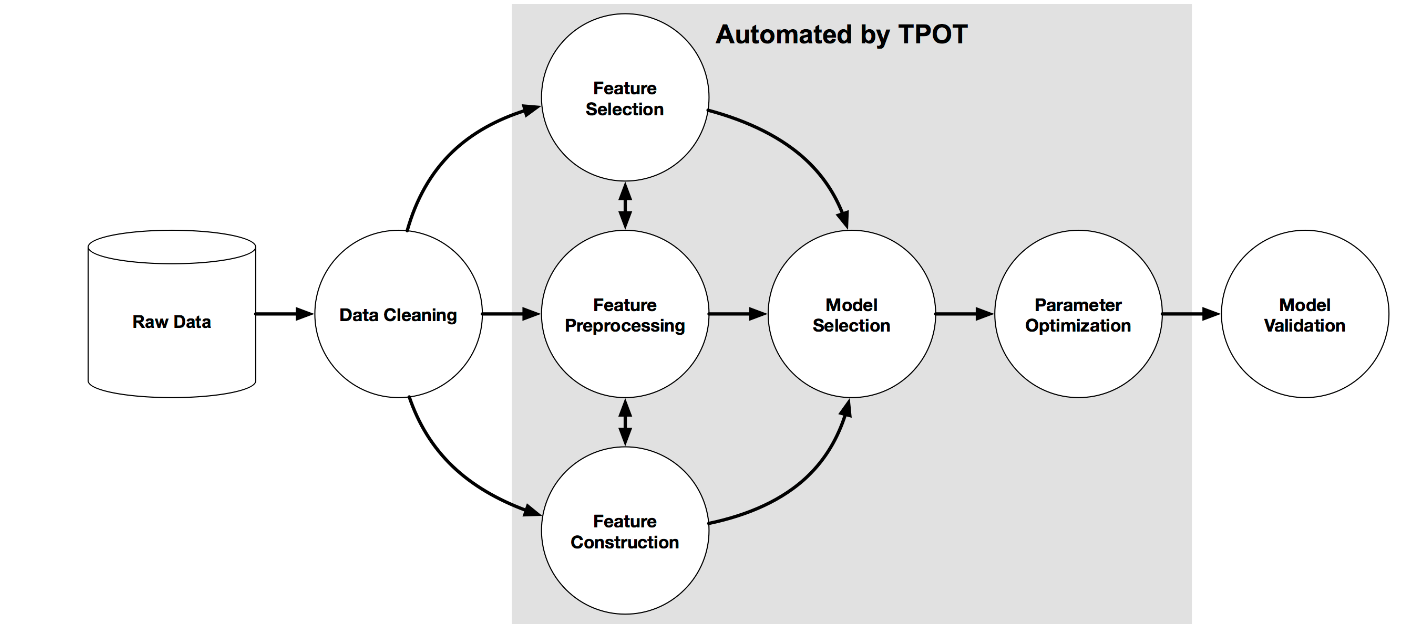

In [11]:
from tpot import  TPOTClassifier
from sklearn.model_selection import train_test_split
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
import numpy as np

In [12]:
churn_df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
print ("Rows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])

Rows     :  7043
Columns  :  21


In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
column_trans = make_column_transformer((OrdinalEncoder(), categorical_columns))

churn_transformed=column_trans.fit_transform(churn_df)

In [15]:
churn_df_trans = churn_df.copy()
churn_df_trans = pd.DataFrame(churn_transformed, columns=categorical_columns)
churn_df.update(churn_df_trans)
     

churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.00,0,1.00,0.00,1,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,2.00,29.85,29.85,0.00
1,5575-GNVDE,1.00,0,0.00,0.00,34,1.00,0.00,0.00,2.00,...,2.00,0.00,0.00,0.00,1.00,0.00,3.00,56.95,1889.5,0.00
2,3668-QPYBK,1.00,0,0.00,0.00,2,1.00,0.00,0.00,2.00,...,0.00,0.00,0.00,0.00,0.00,1.00,3.00,53.85,108.15,1.00
3,7795-CFOCW,1.00,0,0.00,0.00,45,0.00,1.00,0.00,2.00,...,2.00,2.00,0.00,0.00,1.00,0.00,0.00,42.30,1840.75,0.00
4,9237-HQITU,0.00,0,0.00,0.00,2,1.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,2.00,70.70,151.65,1.00


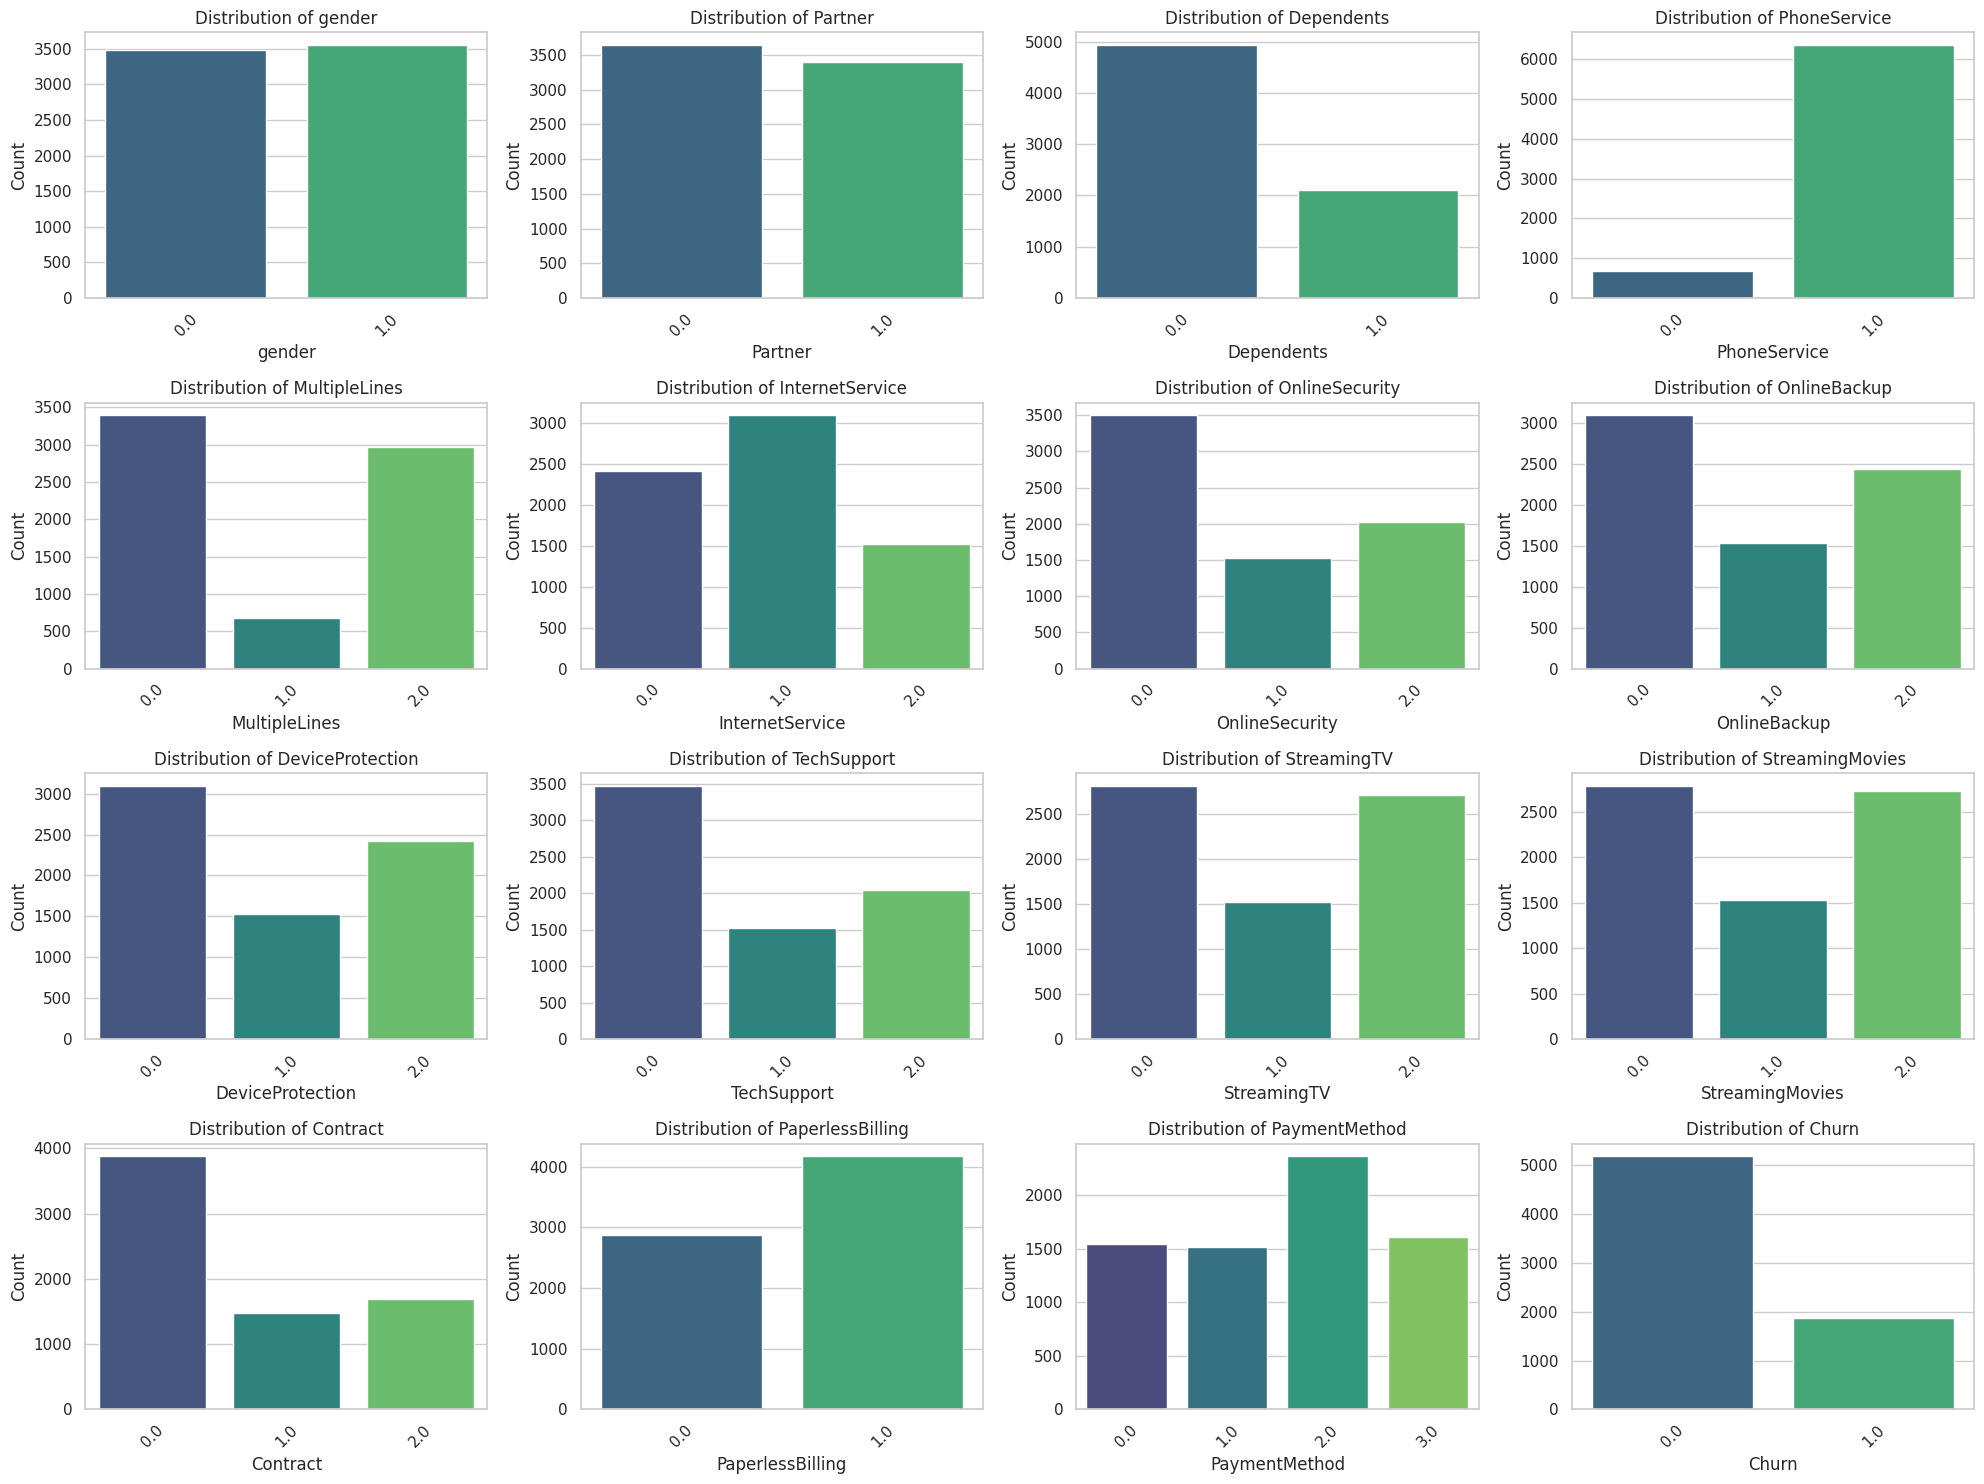

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `churn_transformed` is the transformed DataFrame
# Convert to DataFrame for easier plotting
churn_transformed_df = pd.DataFrame(churn_transformed, columns=categorical_columns)

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a count plot for each categorical column
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns):
    plt.subplot(4, 4, i + 1)  # Create a 4x4 grid of subplots
    sns.countplot(data=churn_transformed_df, x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the layout
plt.show()


In [17]:
churn_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
churn_df.replace(r'^\s*$', np.nan, regex=True).isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
churn_df = churn_df.replace(r'^\s*$', np.nan, regex=True)
churn_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
churn_df.dtypes

customerID           object
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges         object
Churn               float64
dtype: object

In [21]:
churn_df.iloc[:, 19] = pd.to_numeric(churn_df.iloc[:, 19], errors='coerce') 
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
churn_df.iloc[:, 19] = imp_median.fit_transform(churn_df.iloc[:, 19].values.reshape(-1, 1) )
churn_df.isna().sum()

In [23]:
churn_df_X = churn_df.drop("Churn", axis=1)
churn_df_X = churn_df_X.drop("customerID", axis=1)
churn_df_y = churn_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(churn_df_X, churn_df_y, train_size=0.75, test_size=0.25)

In [24]:
tpot =  TPOTClassifier(generations=4, population_size=10, verbosity=3)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

32 operators have been imported by TPOT.


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..

Generation 1 - Current Pareto front scores:

-1	0.7962902439723631	LinearSVC(input_matrix, LinearSVC__C=0.5, LinearSVC__dual=False, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l1, LinearSVC__tol=0.0001)
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.

Generation 2 - Current Pareto front scores:

-1	0.7962902439723631	LinearSVC(input_matrix, LinearSVC__C=0.5, LinearSVC__dual=False, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l1, LinearSVC__tol=0.0001)
_pre_test decorator: _random_mutati

## To have parallel processing while training we use

In [25]:
import multiprocessing
if __name__ == '__main__':
    multiprocessing.set_start_method('forkserver', force=True)
    tpot =  TPOTClassifier(generations=2, population_size=20, verbosity=2,n_jobs = 20, random_state=50)
    tpot.fit(X_train, y_train)

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/60 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7962879146240074

Generation 2 - Current best internal CV score: 0.7987514692812706

Best pipeline: LinearSVC(ZeroCount(input_matrix), C=1.0, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05)


In [26]:
print(tpot.score(X_test, y_test))

0.817717206132879


## Now we convert the whole pipeline to sklearn code which we can copy paste over our notebook for further usage

In [27]:
tpot.export('tpot_churn_pipeline.py')
!cat tpot_churn_pipeline.py

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from tpot.builtins import ZeroCount
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=50)

# Average CV score on the training set was: 0.7987514692812706
exported_pipeline = make_pipeline(
    ZeroCount(),
    LinearSVC(C=1.0, dual=False, loss="squared_hinge", penalty="l1", tol=1e-05)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 50)

exported_pipeline.fit(training_features, training_target)
resu

In [28]:
tpot.evaluated_individuals_

{'ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.1, ExtraTreesClassifier__min_samples_leaf=5, ExtraTreesClassifier__min_samples_split=8, ExtraTreesClassifier__n_estimators=100)': {'generation': 0,
  'mutation_count': 0,
  'crossover_count': 0,
  'predecessor': ('ROOT',),
  'operator_count': 1,
  'internal_cv_score': 0.7881472004816376},
 'KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=29, KNeighborsClassifier__p=2, KNeighborsClassifier__weights=uniform)': {'generation': 0,
  'mutation_count': 0,
  'crossover_count': 0,
  'predecessor': ('ROOT',),
  'operator_count': 1,
  'internal_cv_score': 0.7796293110862648},
 'BernoulliNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=1.0, GradientBoostingClassifier__max_depth=3, GradientBoostingClassifier__max_features=0.8, GradientBoostingClassifier__min_samples_leaf=11, GradientBoostin

In [29]:
tpot.fitted_pipeline_

Pipeline(steps=[('zerocount', ZeroCount()),
                ('linearsvc',
                 LinearSVC(dual=False, penalty='l1', random_state=50,
                           tol=1e-05))])



<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>H2O AutoML</b></div>

H2O AutoML integrates advanced, distributed implementations of machine learning algorithms available in Java, Python, Spark, Scala, and R. It supports deployment on platforms like Spark servers and AWS, facilitated by a web GUI that uses JSON for implementing algorithms.

The primary benefit of H2O AutoML lies in its automation of data processing, model training, tuning, and ensemble construction. This automation allows developers to focus on tasks like data collection, feature engineering, and model deployment.

Key functionalities of H2O AutoML include:
- Providing essential data processing capabilities integrated into all H2O algorithms.
- Training a grid of algorithms such as Gradient Boosting Machines (GBMs), Deep Neural Networks (DNNs), and Generalized Linear Models (GLMs) using carefully selected hyperparameter settings.
- Tuning individual models through cross-validation techniques.
- Building two types of Stacked Ensembles: one optimized for model performance and another optimized for production use.
- Generating a sorted "Leaderboard" that ranks all models based on their performance.
- Offering easy export capabilities for deploying models into production environments.

In [30]:
#java env becuase h2o automl is written in java
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-72).
0 upgraded, 0 newly installed, 0 to remove and 75 not upgraded.
openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1, mixed mode, sharing)


### H2O AutoML can do data preprocessing all by itself it can do categorical, numerical or missing value imputation it can take care of madel selection and give a nice leaderboard view based upon different hyperparameters and it gives a deployment ready code and it includes gpu in xgboost

In [31]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgcs71_j3
  JVM stdout: /tmp/tmpgcs71_j3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgcs71_j3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,4 months and 21 days
H2O_cluster_name:,H2O_from_python_unknownUser_cfjf3z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.250 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [32]:
from h2o.automl import H2OAutoML
churn_df = h2o.import_file('/kaggle/input/titanic/train.csv')
churn_df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:891
Cols:12

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
type,int,int,int,string,enum,real,int,int,int,real,enum,enum
mins,1.0,0.0,1.0,NaN,,0.42,0.0,0.0,693.0,0.0,,
mean,446.0,0.3838383838383838,2.3086419753086447,NaN,,29.69911764705884,0.5230078563411893,0.3815937149270483,260318.5491679275,32.20420796857465,,
maxs,891.0,1.0,3.0,NaN,,80.0,8.0,6.0,3101298.0,512.3292,,
sigma,257.3538420152301,0.4865924542648575,0.8360712409770491,NaN,,14.526497332334035,1.1027434322934315,0.8060572211299488,471609.26868834975,49.69342859718089,,
zeros,0,549,0,0,,0,608,678,0,15,,
missing,0,0,0,0,0,177,0,0,230,0,687,2
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,nan,7.25,,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1.0,0.0,nan,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,nan,7.925,,S


In [33]:
churn_df.types

{'PassengerId': 'int',
 'Survived': 'int',
 'Pclass': 'int',
 'Name': 'string',
 'Sex': 'enum',
 'Age': 'real',
 'SibSp': 'int',
 'Parch': 'int',
 'Ticket': 'int',
 'Fare': 'real',
 'Cabin': 'enum',
 'Embarked': 'enum'}

In [34]:
#70:15:15 split
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])
churn_train

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,nan,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,nan,71.2833,C85,C
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.275,,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16,,S
18,1,2,"Williams, Mr. Charles Eugene",male,nan,0,0,244373,13,,S


In [35]:
y = "Sex"
x = churn_df.columns
x.remove(y)
x.remove("PassengerId")  # Remove "CustomerId"
x.remove("Name")  # Remove "RowNumber"

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Key parameters for H2O's AutoML</div>


1. **nfolds**: 
   - **Purpose**: Number of folds for cross-validation.
   - **Default**: 5 (cross-validation) if not set to 0.
   - **Usage**: Set to 0 if validation data is provided.

2. **max_runtime_secs**:
   - **Purpose**: Maximum duration for the AutoML run.
   - **Default**: 0 (no limit). Dynamically set to 1 hour if both `max_runtime_secs` and `max_models` are not specified.
   
3. **max_models**:
   - **Purpose**: Maximum number of models to build, excluding Stacked Ensemble models.
   - **Default**: None.
   - **Usage**: Set to ensure reproducibility, so models are trained until convergence without time constraints.

4. **x** (optional):
   - **Purpose**: List of predictor columns.
   - **Usage**: Specify if excluding columns from prediction. If using all columns, leave unset.

5. **validation_frame** (optional):
   - **Purpose**: Validation dataset for early stopping.
   - **Usage**: Only used when `nfolds == 0`. Ignored if `nfolds > 1`.

6. **balance_classes**:
   - **Purpose**: Balance class distribution by oversampling minority classes.
   - **Default**: False.
   - **Usage**: Applicable for classification tasks.

7. **class_sampling_factors**:
   - **Purpose**: Specify per-class over/under-sampling ratios.
   - **Usage**: Requires `balance_classes` set to True.

8. **max_after_balance_size**:
   - **Purpose**: Maximum size of training data after balancing.
   - **Default**: 5.0.
   - **Usage**: Value can be less than 1.0.

9. **max_runtime_secs_per_model**:
   - **Purpose**: Maximum time for training each individual model.
   - **Default**: 0 (disabled).

10. **stopping_metric**:
    - **Purpose**: Metric for early stopping.
    - **Default**: AUTO (logloss for classification, deviance for regression).
    - **Options**: deviance, logloss, MSE, RMSE, MAE, RMSLE, AUC, AUCPR, lift_top_group, misclassification, mean_per_class_error.

11. **seed**:
    - **Purpose**: Seed for reproducibility.
    - **Default**: None.
    - **Usage**: Use with `max_models` for reproducibility, exclude "DeepLearning" in `exclude_algos` for reproducibility.

12. **exclude_algos**:
    - **Purpose**: Algorithms to exclude.
    - **Default**: None.
    - **Example**: ["GLM", "DeepLearning", "DRF"], etc.

13. **include_algos**:
    - **Purpose**: Algorithms to include.
    - **Default**: None.
    - **Example**: ["GLM", "DeepLearning", "DRF"], etc.
    - **Options**: `DRF` (This includes both the Distributed Random Forest (DRF) and Extremely Randomized Trees (XRT) models. Refer to the Extremely Randomized Trees section in the DRF chapter and the histogram_type parameter description for more information.), `GLM` (Generalized Linear Model with regularization), `XGBoost` (XGBoost GBM), `GBM`(H2O GBM), `DeepLearning` (Fully-connected multi-layer artificial neural network), `StackedEnsemble` (Stacked Ensembles, includes an ensemble of all the base models and ensembles using subsets of the base models)

14. **verbosity** (optional):
    - **Purpose**: Verbosity of training messages.
    - **Default**: None.
    - **Options**: "debug", "info", "warn".
15. y: This argument is the name (or index) of the response column.
16. training_frame: Specifies the training set.


In [36]:
aml = H2OAutoML(max_models = 20, seed = 1, verbosity="NULL", nfolds=0)

In [37]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20241005_62925


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    35                 35                          16326                  7            7            7             15            34            26.3714

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06178469252157521
RMSE: 0.2485652681320848
LogLoss: 0.22183838923266844
Mean Per-Class Error: 0.07980432764407627
AUC: 0.9759694351210455
AUCPR: 0.9867972493028315
Gini: 0.951938870242091

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5209934486190547
        female    male    Error    Rate
------  --------  ------  -------  ------------
female  185       24      0.1148   (24.0/209.0)
male    18        384     0.0448   (18.0/402.0)
Total   203       408     0.0687   (42.0/611.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.520993     0.948148  237
max f2                       0.386523     0.962384  266
max f0point5                 0.778412     0.953462  183
max accuracy                 0.520993     0.93126   237
max precision                0.984505     1         0
max recall                   0.181886     1         319
max specificity              0.984505     1         0
max absolute_mcc             0.520993     0.846427  237
max min_per_class_accuracy   0.617194     0.915423  219
max mean_per_class_accuracy  0.649054     0.922975  216
max tns                      0.984505     209       0
max fns                      0.984505     401       0
max fps                      0.0284837    209       399
max tps                      0.181886     402       319
max tnr                      0.984505     1         0
max fnr                      0.984505     0.997512  0
max fpr                      0.0284837    1         399
max tpr                      0.181886     1         319

Gains/Lift Table: Avg response rate: 65.79 %, avg score: 65.80 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0114566                   0.980257           1.5199     1.5199             1                0.981396   1                           0.981396            0.0174129       0.0174129                  51.99     51.99              0.0174129
2        0.0212766                   0.978832           1.5199     1.5199             1                0.979142   1                           0.980356            0.0149254       0.0323383                  51.99     51.99              0.0323383
3        0.0310966                   0.977603           1.5199     1.5199             1                0.978369   1                           0.979728            0.0149254       0.0472637                  51.99     51.99              0.0472637
4        0.0409165                   0.976914           1.5199     1.5199             1                0.977166   1                           0.979113            0.0149254       0.0621891                  51.99     51.99              0.0621891
5        0.0507365                   0.976645           1.5199     1.5199             1                0.976776  

In [38]:
#Get leaderboard with all possible columns and use rows=lb.nrows to see all models else by default it is 10
lb = h2o.automl.get_leaderboard(aml)
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_1_20241005_62925,0.828562,0.5099,0.889815,0.215909,0.408197,0.166624
GBM_grid_1_AutoML_1_20241005_62925_model_1,0.822771,0.507629,0.888108,0.253059,0.408842,0.167152
GBM_3_AutoML_1_20241005_62925,0.822662,0.519997,0.884333,0.301573,0.410199,0.168263
XGBoost_3_AutoML_1_20241005_62925,0.822662,0.524125,0.887336,0.233392,0.413027,0.170591
GBM_grid_1_AutoML_1_20241005_62925_model_2,0.821569,0.505632,0.86355,0.228147,0.4006,0.16048
XGBoost_grid_1_AutoML_1_20241005_62925_model_2,0.81698,0.511276,0.872831,0.237325,0.40544,0.164381
GBM_4_AutoML_1_20241005_62925,0.816871,0.521353,0.866344,0.262675,0.409779,0.167919
XGBoost_2_AutoML_1_20241005_62925,0.81545,0.526336,0.877577,0.243007,0.412869,0.170461
XGBoost_grid_1_AutoML_1_20241005_62925_model_1,0.814904,0.511407,0.874458,0.285839,0.410575,0.168571
GBM_5_AutoML_1_20241005_62925,0.808566,0.533878,0.862098,0.246941,0.414767,0.172031


In [39]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [40]:
churn_pred.head()

predict,female,male
male,0.149637,0.850363
female,0.897158,0.102842
male,0.0373339,0.962666
female,0.855343,0.144657
female,0.482446,0.517554
male,0.116994,0.883006
female,0.570543,0.429457
female,0.760956,0.239044
male,0.0459617,0.954038
male,0.308977,0.691023


In [41]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])
model_ids

/opt/conda/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


['GBM_2_AutoML_1_20241005_62925',
 'GBM_grid_1_AutoML_1_20241005_62925_model_1',
 'GBM_3_AutoML_1_20241005_62925',
 'XGBoost_3_AutoML_1_20241005_62925',
 'GBM_grid_1_AutoML_1_20241005_62925_model_2',
 'XGBoost_grid_1_AutoML_1_20241005_62925_model_2',
 'GBM_4_AutoML_1_20241005_62925',
 'XGBoost_2_AutoML_1_20241005_62925',
 'XGBoost_grid_1_AutoML_1_20241005_62925_model_1',
 'GBM_5_AutoML_1_20241005_62925',
 'DeepLearning_grid_2_AutoML_1_20241005_62925_model_1',
 'XGBoost_grid_1_AutoML_1_20241005_62925_model_3',
 'DeepLearning_1_AutoML_1_20241005_62925',
 'XGBoost_1_AutoML_1_20241005_62925',
 'DRF_1_AutoML_1_20241005_62925',
 'XRT_1_AutoML_1_20241005_62925',
 'DeepLearning_grid_1_AutoML_1_20241005_62925_model_1',
 'GLM_1_AutoML_1_20241005_62925',
 'DeepLearning_grid_3_AutoML_1_20241005_62925_model_1',
 'GBM_1_AutoML_1_20241005_62925']

In [42]:
out=h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20241005_62925


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.07101786316328534
RMSE: 0.2664917694100239
LogLoss: 0.24722741848020532
Mean Per-Class Error: 0.11808183960579875
AUC: 0.9659834797305339
AUCPR: 0.981455094294301
Gini: 0.9319669594610678

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43004828691482544
        female    male    Error    Rate
------  --------  ------  -------  ------------
female  169       40      0.1914   (40.0/209.0)
male    18        384     0.0448   (18.0/402.0)
Total   187       424     0.0949   (58.0/611.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.430048     0.929782  253
max f2                       0.243792     0.957652  293
max f0point5                 0.743273     0.946328  186
max accuracy                 0.599625     0.908347  217
max precision                0.997105     1         0
max recall                   0.133142     1         341
max specificity              0.997105     1         0
max absolute_mcc             0.599625     0.804747  217
max min_per_class_accuracy   0.595494     0.902985  219
max mean_per_class_accuracy  0.599625     0.911971  217
max tns                      0.997105     209       0
max fns                      0.997105     401       0
max fps                      0.0172701    209       399
max tps                      0.133142     402       341
max tnr                      0.997105     1         0
max fnr                      0.997105     0.997512  0
max fpr                      0.0172701    1         399
max tpr                      0.133142     1         341

Gains/Lift Table: Avg response rate: 65.79 %, avg score: 65.71 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0114566                   0.993177           1.5199     1.5199             1                0.99491    1                           0.99491             0.0174129       0.0174129                  51.99     51.99              0.0174129
2        0.0212766                   0.991438           1.5199     1.5199             1                0.992407   1                           0.993755            0.0149254       0.0323383                  51.99     51.99              0.0323383
3        0.0310966                   0.99038            1.5199     1.5199             1                0.990879   1                           0.992847            0.0149254       0.0472637                  51.99     51.99              0.0472637
4        0.0425532                   0.989377           1.5199     1.5199             1                0.989709   1                           0.992002            0.0174129       0.0646766                  51.99     51.99              0.0646766
5        0.0523732                   0.988431           1.5199     1.5199             1                0.988679   1                           0.991379            0.0149254       0.079602                   51.99     51.99              0.079602
6        0.101473                    0.982419           1.5199     1.5199             1                0.985772   1                           0.988666            0.0746269       0.154229                   51.99     51.99              0.154229
7        0.150573                    0.978498           

In [43]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20241005_62925',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20241005_62925'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241005_62925_training_py_2_sid_8c5b',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241005_62925_training_py_2_sid_8c5b'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241005_62925_training_py_2_sid_8c5b',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241005_62925_training_py_2_sid_8c5b'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type

### Here we can see a lot of parameters which are of H20 XGBoost parameter but yeah we can convert it to normal XGBoost parameters easily using

In [44]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 4,
  'seed': 9,
  'max_bin': 256,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'gpu_hist'},
 30)

In [45]:
out.varimp_plot()

In [46]:
# to check feature importance
out.varimp_plot()

### I dont know Why i am not getting the feature importance curve

In [47]:
out2=h2o.get_model([mid for mid in model_ids if "DeepLearning" in mid][0])
out2

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_1_20241005_62925_model_1


Status of Neuron Layers: predicting Sex, 2-class classification, bernoulli distribution, CrossEntropy loss, 26,302 weights/biases, 316.9 KB, 617,110 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms           mean_bias               bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ----------------------  -------------------  ----------------------  -------------------
    1        159      Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.2186352718120298     0.41174137592315674    0.0         -0.0009561890415240565  0.09259450435638428  0.26638322136843146     0.22027981281280518
    3        100      RectifierDropout  10.0       0.0   0.0   0.014774461032281397   0.042991191148757935   0.0         -0.028014607846963555   0.10677960515022278  0.890022595736481       0.07227882742881775
    4        2        Softmax                      0.0   0.0   0.0022115229882183484  0.0015033921226859093  0.0         -0.007461049053817987   0.5484728813171387   -0.0005109574614547835  0.1260392665863037

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.10031026462002504
RMSE: 0.3167179575269218
LogLoss: 0.3213964043603763
Mean Per-Class Error: 0.14736127972577306
AUC: 0.9379359184936561
AUCPR: 0.9660086094634408
Gini: 0.8758718369873122

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3563786649397621
        female    male    Error    Rate
------  --------  ------  -------  ------------
female  163       46      0.2201   (46.0/209.0)
male    30        372     0.0746   (30.0/402.0)
Total   193       418     0.1244   (76.0/611.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.356379     0.907317  263
max f2                       0.0733454    0.943662  347
max f0point5                 0.65205      0.91638   191
max accuracy                 0.36704      0.875614  259
max precision                0.999687     1         0
max recall                   0.0733454    1         347
max specificity              0.999687     1         0
max absolute_mcc             0.522248     0.720587  226
max min_per_class_accuracy   0.522248     0.868159  226
max mean_per_class_accuracy  0.522248     0.869486  226
max tns                      0.999687     209       0
max fns                      0.999687     395       0
max fps                      0.00129514   209       399
max tps                      0.0733454    402       347
max tnr                      0.999687     1         0
max fnr                      0.999687     0.982587  0
max fpr                      0.00129514   1         399
max tpr                      0.0733454    1         347

Gains/Lift Table: Avg response rate: 65.79 %, avg score: 58.68 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0114566                   0.99952            1.5199    1.5199             1                0.999687   1                           0.999687            0.0174129       0.0174129                  51.99     51.99              0.0174129
2        0.0212766                   0.99

In [48]:
out2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_grid_2_AutoML_1_20241005_62925_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_grid_2_AutoML_1_20241005_62925_model_1'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241005_62925_training_py_2_sid_8c5b',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241005_62925_training_py_2_sid_8c5b'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241005_62925_training_py_2_sid_8c5b',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241005_62925_training_py_2_sid_8c5b'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_n

In [49]:
#getting params from deep learning is pretty tough as we dont have any inbuilt function for that so we need to write a function for this
def convert_H2ODeepLearningParams_2_DeepLearningParams(h2o_params):
    dl_params = {}

    # Map H2O Deep Learning parameters to general Deep Learning framework parameters
    if 'activation' in h2o_params:
        dl_params['activation'] = h2o_params['activation']

    if 'hidden' in h2o_params:
        dl_params['hidden_layers'] = h2o_params['hidden']

    if 'epochs' in h2o_params:
        dl_params['epochs'] = h2o_params['epochs']

    if 'train_samples_per_iteration' in h2o_params:
        dl_params['batch_size'] = h2o_params['train_samples_per_iteration']

    if 'rate' in h2o_params:
        dl_params['learning_rate'] = h2o_params['rate']

    if 'rate_annealing' in h2o_params:
        dl_params['learning_rate_decay'] = h2o_params['rate_annealing']

    if 'l1' in h2o_params:
        dl_params['l1_regularization'] = h2o_params['l1']

    if 'l2' in h2o_params:
        dl_params['l2_regularization'] = h2o_params['l2']

    if 'momentum_stable' in h2o_params:
        dl_params['momentum'] = h2o_params['momentum_stable']

    if 'rho' in h2o_params:
        dl_params['rho'] = h2o_params['rho']

    if 'epsilon' in h2o_params:
        dl_params['epsilon'] = h2o_params['epsilon']

    if 'max_w2' in h2o_params:
        dl_params['max_weight'] = h2o_params['max_w2']

    if 'initial_weight_distribution' in h2o_params:
        dl_params['weight_init'] = h2o_params['initial_weight_distribution']

    if 'initial_weight_scale' in h2o_params:
        dl_params['weight_scale'] = h2o_params['initial_weight_scale']

    if 'loss' in h2o_params:
        dl_params['loss_function'] = h2o_params['loss']

    if 'stopping_metric' in h2o_params:
        dl_params['early_stopping_metric'] = h2o_params['stopping_metric']

    if 'stopping_rounds' in h2o_params:
        dl_params['early_stopping_rounds'] = h2o_params['stopping_rounds']

    if 'stopping_tolerance' in h2o_params:
        dl_params['early_stopping_tolerance'] = h2o_params['stopping_tolerance']

    if 'score_interval' in h2o_params:
        dl_params['validation_freq'] = h2o_params['score_interval']

    # Return the converted parameters as a DataFrame
    return pd.DataFrame.from_dict(dl_params, orient='index')


converted_params = convert_H2ODeepLearningParams_2_DeepLearningParams(out2.params)
converted_params

,default,actual,input
activation,Rectifier,RectifierWithDropout,RectifierWithDropout
hidden_layers,"[200, 200]","[100, 100]","[100, 100]"
epochs,10.00,10000.00,10000.00
batch_size,-2,-2,-2
learning_rate,0.01,0.01,0.01
learning_rate_decay,0.00,0.00,0.00
l1_regularization,0.00,0.00,0.00
l2_regularization,0.00,0.00,0.00
momentum,0.00,0.00,0.00
rho,0.99,0.90,0.90


In [50]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])
out_gbm.confusion_matrix()

,female,male,Error,Rate
female,185.0,24.0,0.1148,(24.0/209.0)
male,18.0,384.0,0.0448,(18.0/402.0)
Total,203.0,408.0,0.0687,(42.0/611.0)




<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>H2O integration with Sklearn</b></div>

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">h2o.sklearn</div>



The `h2o.sklearn` module introduces a new approach while maintaining compatibility with existing estimators and transformers. Instead of modifying the original `h2o.estimators` and `h2o.transforms`, this module offers autogenerated wrappers layered atop them, including H2OAutoML.

These wrappers are designed to cater to a wide range of use-cases for integrating H2O-3 with sklearn:

- They adopt sklearn's naming conventions, such as `H2OGradientBoostingClassifier`, `H2OAutoMLClassifier` for classifiers (built on top of `H2OGradientBoostingEstimator`, `H2OAutoML`). These ensure that the target variables are automatically categorized.
  
- For regressors, names like `H2OGradientBoostingRegressor`, `H2OAutoMLRegressor` are used (based on `H2OGradientBoostingEstimator`, `H2OAutoML`).
  
- Generic estimators are exposed through names like `H2OGradientBoostingEstimator`, `H2OAutoMLEstimator`, accepting an `estimator_type` parameter (`None`, `'classifier'`, or `'regressor'`).

- The wrappers exclusively expose a sklearn-like API, featuring:
  - Constructors accepting all parameters as keyword arguments, facilitating auto-completion in environments like Jupyter notebooks.
  - `get_params()` and `set_params(**params)`, with `get_params()` returning all possible parameters, not just those explicitly set.
  - Methods like `fit(X, y)`, `predict(X)`, `fit_predict(X, y)` for all estimators (including `H2OAutoML`).
  - `predict_proba(X)`, `predict_log_proba(X)` for classifiers supporting probability predictions.
  - Transformation methods like `transform(X)`, `fit_transform(X, y)`, `inverse_transform(X)` for transformers and estimators that support transformations (e.g., `H2OPrincipalComponentAnalysisEstimator`).
  - `score(X, y)` for estimators, using sklearn's metrics such as `sklearn.metrics.accuracy_score` for classifiers and `sklearn.metrics.r2_score` for regressors.
  - An `estimator` property (available since 3.28.0.2; as `_estimator` in 3.28.0.1), providing a reference to the original `H2OEstimator` or `H2OAutoML` instance, allowing access to additional properties and methods.
  
- `X` and `y` parameters accept various data types (`H2OFrame`, `numpy` arrays, `pandas.DataFrame`). The wrappers attempt to return predictions or transformations in the same format as the input, facilitating seamless integration with sklearn components in `sklearn.pipeline.Pipeline`.

- For ease of use, the wrappers can handle automatic connection management to the local backend, including auto-start, auto-connect, and auto-shutdown when the wrapper is no longer in use. Note that this automatic connection management is disabled if the user initiates a connection using `h2o.init()` beforehand.

In [51]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd  
# pandas >= 0.19.2 required
train = pd.read_csv("https://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_train.csv").values
test = pd.read_csv("https://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_test.csv").values
X_train = train[:,:-1]
y_train = train[:,-1]
X_test = test[:,:-1]
y_test = test[:,-1]
X_train[:10], y_train[:10]

(array([[6.0, 2.2, 4.0, 1.0],
        [5.2, 3.4, 1.4, 0.2],
        [6.9, 3.1, 5.4, 2.1],
        [7.3, 2.9, 6.3, 1.8],
        [7.6, 3.0, 6.6, 2.1],
        [5.6, 3.0, 4.5, 1.5],
        [5.4, 3.4, 1.7, 0.2],
        [6.4, 3.2, 5.3, 2.3],
        [4.5, 2.3, 1.3, 0.3],
        [6.2, 3.4, 5.4, 2.3]], dtype=object),
 array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
        'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica'],
       dtype=object))

In [52]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from h2o.sklearn import H2OGradientBoostingClassifier

seed = 42

pipeline_mix = Pipeline([
    ("standardize", StandardScaler()),
    ("pca", PCA(n_components=2, random_state=seed)),
    ("classifier", H2OGradientBoostingClassifier(seed=seed))
])

In [53]:
assert 'learn_rate' in pipeline_mix.named_steps.classifier.get_params()
pipeline_mix.set_params(classifier__learn_rate=0.01)
assert pipeline_mix.named_steps.classifier.learn_rate == 0.01

Now that our pipeline is defined, we can train our model. Note that as we haven't initialized H2O-3 yet (normally using the h2o.init() method), then it will be automatically started by the first H2O component encountered in the pipeline.
Please also note the progress bars showing that the training numpy data are converted and uploaded to the H2O backend. If you're annoyed by those progress bars and want to hide them, you should simply initialized H2O using `h2o.init(show_progress=False)`. This can also be done directly in the `h2o.sklearn wrapper`, using for example `H2OGradientBoostingClassifier(seed=seed,init_connection_args=dict(show_progress=False))`

In [54]:
pipeline_mix.fit(X_train, y_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Pipeline(steps=[('standardize', StandardScaler()),
                ('pca', PCA(n_components=2, random_state=42)),
                ('classifier',
                 H2OGradientBoostingClassifier(learn_rate=0.01, seed=42))])

In [55]:
preds = pipeline_mix.predict(X_test)
assert isinstance(preds, np.ndarray)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [56]:
# get accuracy score (automatically calls `predict` on the estimator internally)
pipeline_mix.score(X_test, y_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


0.94

In [57]:
gbm_wrapper = pipeline_mix.named_steps.classifier
gbm_wrapper.estimator  # use gbm_wrapper._estimator in 3.28.0.1

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1728109758380_312


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 150                         17540                  1            4            3.61333       2             6             4.62667

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.18709890373026358
RMSE: 0.43254930786011386
LogLoss: 0.5659162612656915
Mean Per-Class Error: 0.0664488017429194
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error      Rate
-------------  -----------------  ----------------  ---------  -------
30             0                  0                 0          0 / 30
0              31                 3                 0.0882353  3 / 34
0              4                  32                0.111111   4 / 36
30             35                 35                0.07       7 / 100

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.93
2    1
3    1

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_logloss    training_classification_error    training_auc    training_pr_auc
---  -------------------  ----------  -----------------  -------------------  ------------------  -------------------------------  --------------  -----------------
     2024-10-05 06:31:00  0.002 sec   0.0                0.666666666666666    1.0986122886681082  0.72                             nan             nan
     2024-10-05 06:31:00  0.022 sec   1.0                0.6608930500745321   1.0814478981309663  0.07                             nan             nan
     2024-10-05 06:31:00  0.026 sec   2.0                0.6551584062494401   1.0647012306953214  0.07                             nan             nan
     2024-10-05 06:31:00  0.031 sec   3.0                0.6494633572191616   1.0483567396888247  0.07                             nan             nan
     2024-10-05 06:31:00  0.036 sec   4.0                0.643808497535696    1.0323997493940482  0.07                             nan             nan
     2024-10-05 06:31:00  0.040 sec   5.0                0.6381943949015314   1.0168163876127614  0.07                             nan             nan
     2024-10-05 06:31:00  0.044 sec   6.0                0.6326215925827304   1.001593534168196   0.07                             nan             nan
     2024-10-05 06:31:00  0.048 sec   7.0                0.6270906066315642   0.9867187523482503  0.07                             nan             nan
     2024-10-05 06:31:00  0.052 sec   8.0                0.6216019283692609   0.9721802512055072  0.07                             nan             nan
     2024-10-05 06:31:00  0.055 sec   9.0                0.6161560224817751   0.9579668308097331  0.07                             nan             nan
---  ---                  ---         ---                ---                  ---                 ---                              ---             ---
     2024-10-05 06:31:00  0.181 sec   41.0               0.46609828887260824  0.6282533518320341  0.07                             nan             nan
     2024-10-05 06:31:00  0.185 sec   42.0               0.46218541144704517  0.6208326539064128  0.07                             nan             

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Using only h2o.sklearn components</div>

In [58]:
from h2o import H2OFrame
from h2o.sklearn import H2OScaler, H2OPCA, H2OGradientBoostingClassifier
seed = 42

pipeline_h2o = Pipeline([
    ("standardize", H2OScaler()),
    ("pca", H2OPCA(k=2, seed=seed)),
    ("classifier", H2OGradientBoostingClassifier(learn_rate=0.05, seed=seed))
])

### Here, as we are using only H2O components, we will look at the behaviour of the pipeline when we feed it with `H2OFrames`, and then when we feed it with numpy arrays.

In [59]:
X_train_h2o, y_train_h2o = H2OFrame(X_train), H2OFrame(y_train)
X_test_h2o, y_test_h2o = H2OFrame(X_test), H2OFrame(y_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [60]:
pipeline_h2o.fit(X_train_h2o, y_train_h2o)

pca Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
pca prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Pipeline(steps=[('standardize', H2OScaler()), ('pca', H2OPCA(k=2, seed=42)),
                ('classifier',
                 H2OGradientBoostingClassifier(learn_rate=0.05, seed=42))])

In [61]:
preds = pipeline_h2o.predict(X_test_h2o)
assert isinstance(preds, H2OFrame)
pipeline_h2o.score(X_test_h2o, y_test_h2o)

pca prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
pca prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


0.98

### With numpy arrays

In [62]:
pipeline_h2o.fit(X_train, y_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
pca Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
pca prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Pipeline(steps=[('standardize', H2OScaler()), ('pca', H2OPCA(k=2, seed=42)),
                ('classifier',
                 H2OGradientBoostingClassifier(learn_rate=0.05, seed=42))])

In [63]:
preds = pipeline_h2o.predict(X_test)
assert isinstance(preds, H2OFrame)
pipeline_h2o.score(X_test, y_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
pca prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
pca prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


0.98

In this context, one might expect that the predictions from the `predict` method would naturally be represented as a numpy array. However, due to the logic implemented in the h2o.sklearn wrappers for data format detection, this expectation isn't reliably met. The default logic is straightforward: for a given estimator wrapper, the output type matches the input type:

- numpy array in -> numpy array out
- H2OFrame in -> H2OFrame out
- pandas DataFrame in -> numpy array out (with a minor exception, aligning with sklearn's behavior)

This default behavior does not extend to transformer wrappers by default. Transformers are typically chained with other H2O transformers or estimators, so the `transform` method does not automatically convert its result back to ensure minimal unnecessary conversions within the pipeline.

To control the output format of a wrapper, you can use the `data_conversion` parameter, which accepts three possible values:

- `'auto'` (default for estimators): The result matches the input type, as described above.
- `True`: The result is always converted to a numpy array.
- `False` (default for transformers): The result remains unchanged and is returned as an H2OFrame.

For pipelines involving multiple H2O transformers before an estimator, if you prefer to consistently receive numpy arrays, you can adjust the pipeline slightly as follows:

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>H2OAutoML specifically for Classification and Regression tasks</b></div>

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">H2OAutoMLClassifier</div>


In [64]:
import warnings
warnings.filterwarnings(action='ignore')

from sklearn import datasets
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report

from h2o.sklearn import H2OAutoMLClassifier

seed = 2020

X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipeline = Pipeline([
    ('polyfeat', PolynomialFeatures(degree=2)),
    ('featselect', SelectKBest(f_classif, k=5)),
    ('classifier', H2OAutoMLClassifier(max_models=10, seed=seed, sort_metric='aucpr'))
])

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [65]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        51
           1       0.98      0.91      0.94        92

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.93      0.93      0.93       143



In [66]:
automl = pipeline.named_steps.classifier.estimator
automl.leaderboard

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
GBM_2_AutoML_2_20241005_63105,0.989956,0.984835,0.142728,0.0546818,0.200264,0.0401058
GBM_4_AutoML_2_20241005_63105,0.989314,0.984437,0.144646,0.0596742,0.200382,0.0401531
XGBoost_2_AutoML_2_20241005_63105,0.988229,0.983581,0.142018,0.0577874,0.188276,0.0354479
GBM_3_AutoML_2_20241005_63105,0.987655,0.982656,0.146526,0.0565686,0.200446,0.0401788
GLM_1_AutoML_2_20241005_63105,0.985674,0.98296,0.133624,0.046701,0.186672,0.0348464
StackedEnsemble_AllModels_1_AutoML_2_20241005_63105,0.982069,0.981097,0.139149,0.0498066,0.191247,0.0365753
DRF_1_AutoML_2_20241005_63105,0.98199,0.979878,0.285826,0.0499238,0.20194,0.0407799
XGBoost_3_AutoML_2_20241005_63105,0.981882,0.980839,0.137467,0.0448143,0.190572,0.0363176
GBM_1_AutoML_2_20241005_63105,0.981198,0.978038,0.144801,0.0577874,0.194771,0.0379359
StackedEnsemble_BestOfFamily_1_AutoML_2_20241005_63105,0.976566,0.979023,0.144075,0.0510254,0.189882,0.0360553


<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">H2OAutoMLRegressor</div>

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from h2o.sklearn import H2OAutoMLRegressor

ds = datasets.fetch_california_housing()
seed = 2020
regressor = H2OAutoMLRegressor(max_models=10, max_runtime_secs_per_model=30, seed=seed)
grid = GridSearchCV(regressor, cv=2, param_grid=dict(
    monotone_constraints=[None, dict(AGE=1), dict(PTRATIO=1), dict(CRIM=-1)],
))

X = pd.DataFrame(ds.data, columns=ds.feature_names)
y = ds.target
grid.fit(X, y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |██████████████████████████████████

In [ ]:
best = grid.best_estimator_
grid.best_params_

In [ ]:
grid.cv_results_

In [ ]:
automl = best.estimator
automl.leaderboard

Few references I used:
https://github.com/h2oai/h2o-tutorials/tree/master

### Rest things stays the same as mentioned before that how to fetch the best model how to fetch the best parameters and how to train, All remains the same

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0f7a7a; overflow:hidden"><b>Auto EDA</b></div>

In [ ]:
!pip install ydata-profiling
!pip install dataprep
!pip install dabl
!pip install autoviz
!pip install sweetviz

In [ ]:
import pandas as pd
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df.head()

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">Pandas Profiling</div>

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Indian Diabetes Report")
profile.to_file("Indian_Diabetes_report.html")

profile.to_notebook_iframe()

<div style="padding:10px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#215f95;;overflow:hidden;font-weight:501;font-family:magra">SweetViz</div>

In [ ]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html("sweetviz_Indian_Diabetes_report.html")
report.show_notebook()

##### If you found this useful do support and if you find any flaws or find any solution to installing libaries like autosklearn and all do let me know in the comment as I am looking forward for a solution yet :)